<a href="https://colab.research.google.com/github/Chzacher/ENSYS5800-AI-Energy-zacher.c/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[3 pts] Solve example problem 5.3 (regression trees) from lecture 5, using Python (Jupyter
Notebook), using just EnergyStarScore as the predictor variable. Create a diagram of the
regression tree, including the binary splits. Repeat this process using both EnergyStarScore and
YearBuilt as the predictor variables.** 

In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [2]:
#import data and create database
dtrain = {'Site_EUI':[365.2, 472, 486.9, 401.2, 351.4, 332.7, 329.8, 340.7, 363.1, 375.3, 335.3, 426.3, 520.3, 389, 331.5], 'YearBuilt':[1990,1981,2008,2010,1986,1950,1975,1913,1891,1920,1978,1918,1920,1970,1910], 'EnergyStarScore':[1,1,1,5,60,50,21,7,1,9,24,1,1,1,28]}
dftrain = pd.DataFrame(data=dtrain, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
dftrain.index.name='Case'
dtest = {'Site_EUI':[328.8, 316.5, 420.3, 341, 413.9], 'YearBuilt':[1988,1973,1985,2000,2002], 'EnergyStarScore':[7,2,15,24,1]}
dftest = pd.DataFrame(data=dtest, index=[16,17,18,19,20])
dftest.index.name='Case'


In [3]:
print(dftrain)

print(dftest)

      Site_EUI  YearBuilt  EnergyStarScore
Case                                      
1        365.2       1990                1
2        472.0       1981                1
3        486.9       2008                1
4        401.2       2010                5
5        351.4       1986               60
6        332.7       1950               50
7        329.8       1975               21
8        340.7       1913                7
9        363.1       1891                1
10       375.3       1920                9
11       335.3       1978               24
12       426.3       1918                1
13       520.3       1920                1
14       389.0       1970                1
15       331.5       1910               28
      Site_EUI  YearBuilt  EnergyStarScore
Case                                      
16       328.8       1988                7
17       316.5       1973                2
18       420.3       1985               15
19       341.0       2000               24
20       41

Using EnergyStarScore as the predictor value

In [11]:
#Code utilized from Module 5 sample code
#Decision Trees Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# Creating the Predictor and Response Variables
X_train = pd.DataFrame([])
X_train = dftrain[dftrain.columns[2:]]
X_test = dftest[dftest.columns[2:]]
y_train = dftrain['Site_EUI'].to_numpy()
y_test = dftest['Site_EUI'].to_numpy()
y_train = y_train.reshape(-1,1)
#Scaling the data
sc_X = StandardScaler()
sc_y = StandardScaler()

scaled_x = sc_X.fit_transform(X_train)
scaled_y = sc_y.fit_transform(y_train)
scaled_x_test = sc_X.fit_transform(X_test)

#Using the Linear Regression Model to predict the output
regressor = DecisionTreeRegressor()
regressor.fit(scaled_x,scaled_y.ravel())
y_pred = regressor.predict(scaled_x_test)
y_pred=sc_y.inverse_transform(y_pred)
#Saving the predicted output in a dataframe
y_pred=pd.DataFrame(y_pred)
#Saving the actual output in a dataframe
y_test=pd.DataFrame(y_test)
#Calculating the R squared and Mean Squared Error Values
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_r2 = r2_score(y_test, y_pred)
print(test_set_rmse)
print(test_set_r2)

67.93857970435427
-1.3831470518429994


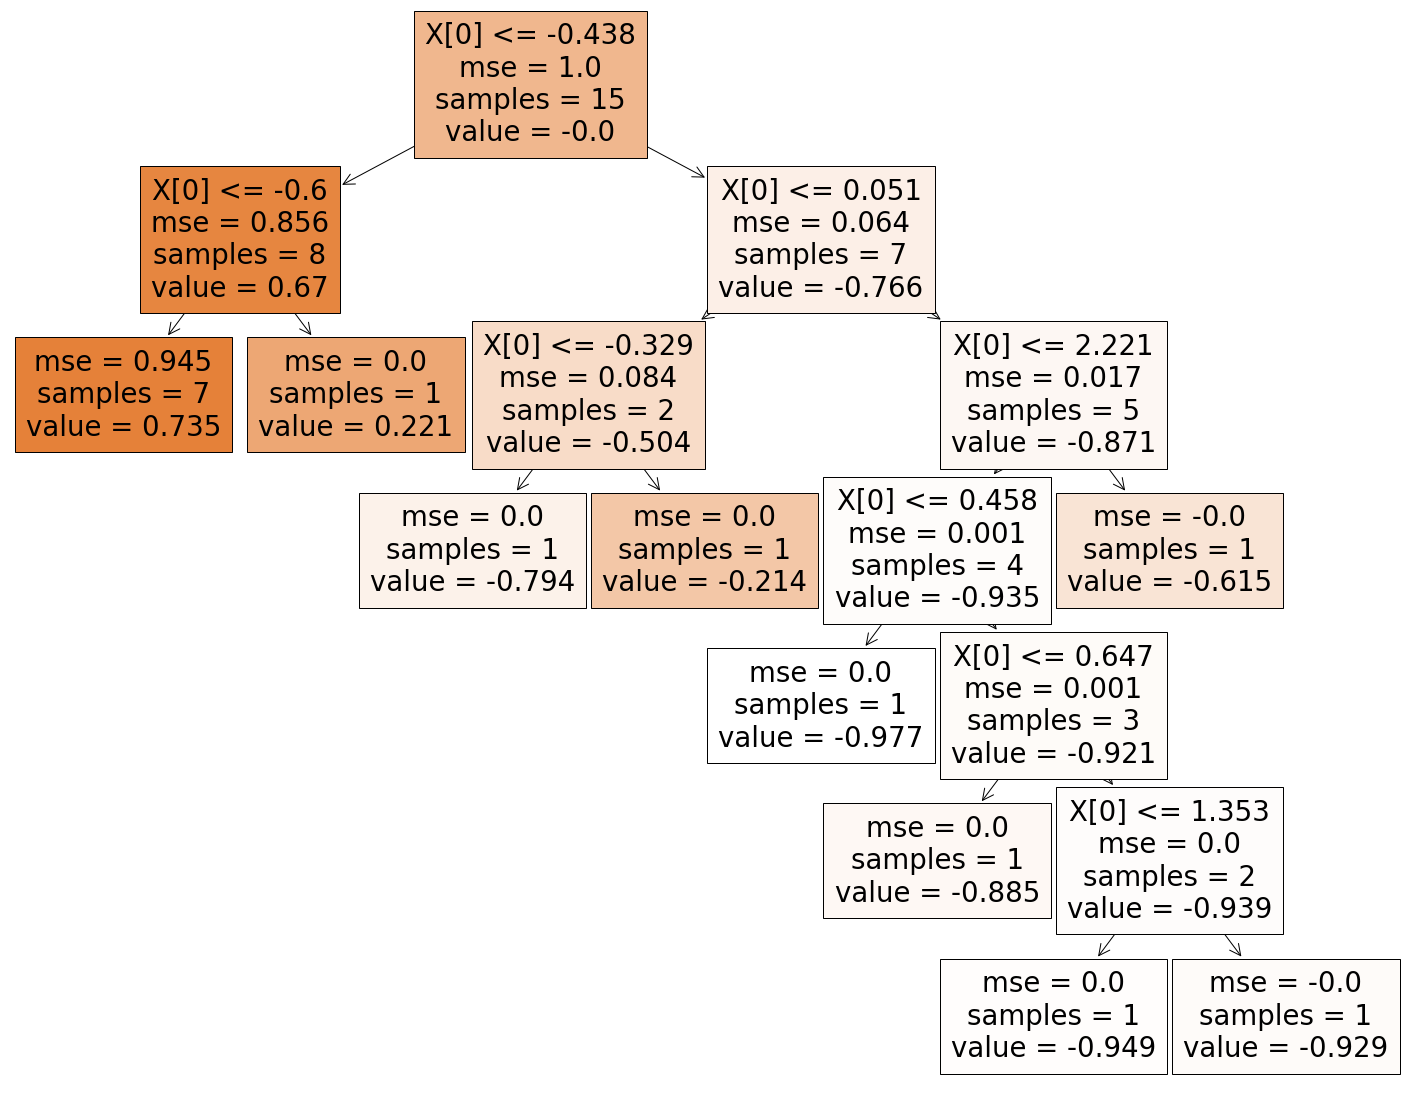

In [12]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, filled=True)

Using both EnergyStarScore and YearBuilt as predictors

In [13]:
#Code utilized from Module 5 sample code
#Decision Trees Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# Creating the Predictor and Response Variables
X_train = pd.DataFrame([])
X_train = dftrain[dftrain.columns[1:]]
X_test = dftest[dftest.columns[1:]]
y_train = dftrain['Site_EUI'].to_numpy()
y_test = dftest['Site_EUI'].to_numpy()
y_train = y_train.reshape(-1,1)
#Scaling the data
sc_X = StandardScaler()
sc_y = StandardScaler()

scaled_x = sc_X.fit_transform(X_train)
scaled_y = sc_y.fit_transform(y_train)
scaled_x_test = sc_X.fit_transform(X_test)

#Using the Linear Regression Model to predict the output
regressor = DecisionTreeRegressor()
regressor.fit(scaled_x,scaled_y.ravel())
y_pred = regressor.predict(scaled_x_test)
y_pred=sc_y.inverse_transform(y_pred)
#Saving the predicted output in a dataframe
y_pred=pd.DataFrame(y_pred)
#Saving the actual output in a dataframe
y_test=pd.DataFrame(y_test)
#Calculating the R squared and Mean Squared Error Values
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_r2 = r2_score(y_test, y_pred)
print(test_set_rmse)
print(test_set_r2)

59.29711628738788
-0.8154532142908784


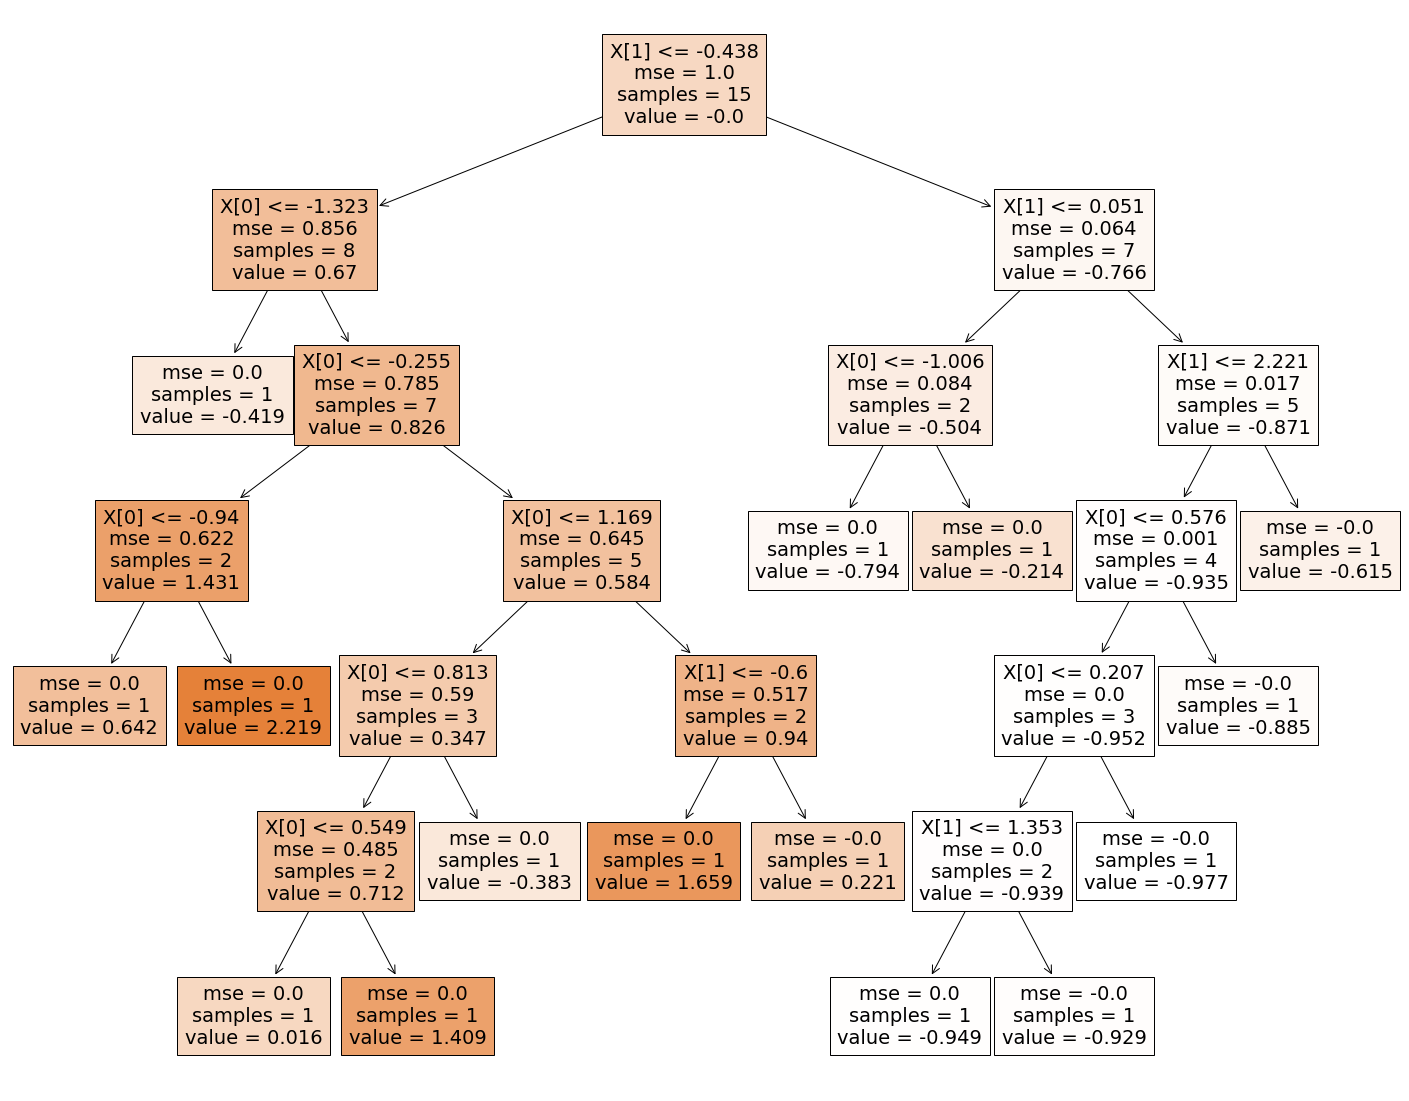

In [14]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, filled=True)

**Problem 6 part b**

In [22]:
from sklearn.decomposition import PCA
W = np.array([[1990,1], [1981,1], [2008,1], [2010,5], [1986,60], [1950,50], [1975,21], [1913,7], [1891,1], [1920,9], [1978,24], [1918,1], [1920,1], [1970,1], [1910,28], [1988,7], [1973,2], [1985,15], [2000,24], [2002,1]])
pca = PCA()
pca.fit(W)
print(pca.explained_variance_ratio_)

[0.828895 0.171105]
